In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy



train_dir = '/content/drive/My Drive/cas_peal/train'
validation_dir = '/content/drive/My Drive/cas_peal/test'

image_size = 150
batch_size = 32

train_datagen = keras.preprocessing.image.ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(directory=train_dir, target_size=(image_size, image_size), batch_size=batch_size)

validation_datagen = keras.preprocessing.image.ImageDataGenerator()

validation_generator = validation_datagen.flow_from_directory(directory=validation_dir, target_size=(image_size, image_size), batch_size=batch_size)

IMG_SHAPE = (image_size, image_size, 3)

base_model = tf.keras.applications.MobileNet(input_shape=IMG_SHAPE, include_top=False)
base_model.trainable = False

base_model = tf.keras.Sequential([
  base_model,
  keras.layers.GlobalAveragePooling2D(),
  keras.layers.Dense(20, activation='softmax')
])

base_model.summary()

base_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs = 5
steps_per_epoch = numpy.ceil(train_generator.n / batch_size)
validation_steps = numpy.ceil(validation_generator.n / batch_size)

history = base_model.fit_generator(generator=train_generator,
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs,
                              validation_data=validation_generator,
                              validation_steps=validation_steps)

base_model.save('MobileNet_TransferLearning_Face.h5')

Found 639 images belonging to 20 classes.
Found 60 images belonging to 20 classes.
17227776/17225924 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 4, 4, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 20)                20500     
Total params: 3,249,364
Trainable params: 20,500
Non-trainable params: 3,228,864
_________________________________________________________________
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
20/20 [==============================] - 473s 24s/step - loss: 3.5391 - accuracy: 0.0485 - val_loss: 3.3291 - val_accuracy: 0.0833
Epoch 

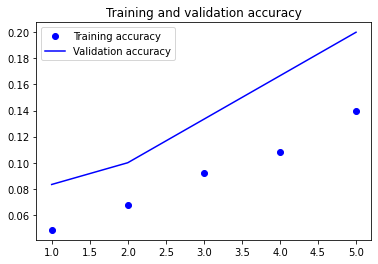

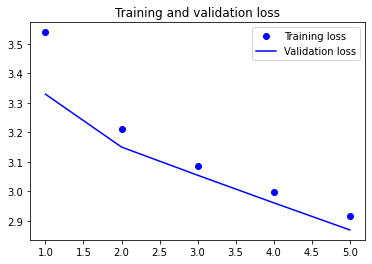

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [2]:
from tensorflow.keras.models import load_model

base_model = load_model('MobileNet_TransferLearning_Face.h5')
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 4, 4, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 20)                20500     
Total params: 3,249,364
Trainable params: 20,500
Non-trainable params: 3,228,864
_________________________________________________________________
